In [2]:
#Importamos las bibliotecas a utilizar 
import numpy as np
import matplotlib.pyplot as plt
from math import cos
from scipy.integrate import ode

In [3]:
#Definimos nuestra ecuación diferencial
def f(t, z, p):
    #----------------------------------------------
    # Lado derecho de las ecuaciones diferenciales
    #  dx/dt = y
    #  dy/dt = - δ*y - α*dx - β*x**3 + γ*cos(ω*t)
    #----------------------------------------------
        
    δ, α, β, γ, ω = p                           #Parámetros de nuestra integral
    x, y = z                                    #Parámetros de integración
    f = [y, - δ*y - α*x - β*x**3 + γ*cos(ω*t)]  #Función a integrar
    
    return f
    
#Creamos una instancia para resolver la ecuación diferencial a través del método 'dopri5'
solver = ode(f)
solver.set_integrator('dopri5')
    
#Especificamos los parámetros de la ecuación a nuestra función
α = -1.0
δ = 0.3
β = 1.0
ω = 1.2
gamma = [0.20,0.28,0.29,0.37,0.65]

#Creamos arreglos que almacenen los resultados para cada valor de gamma
grafx = []
grafy = []
g = []


for i in range(0,len(gamma)):
    
    #Establecemos las condiciones iniciales
    t0 = 0.0
    z0 = [1.0, 0.0] 
    solver.set_initial_value(z0, t0)

    γ = gamma[i]
    val = δ, α, β, γ, ω                      
    solver.set_f_params(val)
    
    #Creamos un arreglo de valores de tiempo t para los cuales evalue la solución; creamos también un arreglo que 
    #almacene los valores obtenidos
    t1 = 20
    n = 1000
    t = np.linspace(t0, t1, n)
    
   #-----------------------------------------------------------------------------------------------
   #Establecemos un periodo para obtener puntos en el tiempo que sean múltiplos del periodo
   # T = (2*np.pi)/ω
   # Tt = []
   # for j in range (0,n):
   #     Tt.append(t[j]/T)
   #    
   # tT = np.array(Tt)
   #------------------------------------------------------------------------------------------------
    sol = np.empty((n, 2))
    sol[0] = z0
      
    #Llamamos repetidamente al integrador para que avance en la solución un tiempo t1
    k = 1
    
    while solver.successful() and solver.t < t1:
        solver.integrate(t[k])
        sol[k] = solver.y
        k += 1
        
    x = sol[:,0]
    y = sol[:,1]
                
    #Actualizamos las condiciones iniciales
    g.append(γ)
    grafx.append(x)
    grafy.append(y)

In [17]:
#Establecemos un periodo para obtener puntos en el tiempo que sean múltiplos del periodo
#T = (2*np.pi)/ω
#tT = []
#for j in range (0,n):
#    tT.append(t[j]/T)

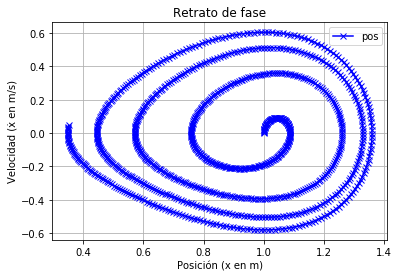

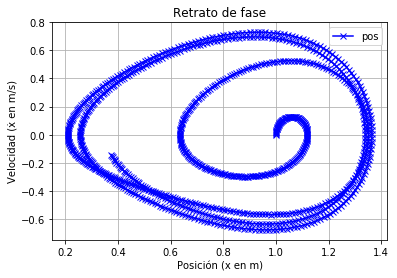

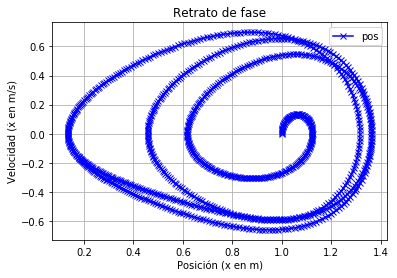

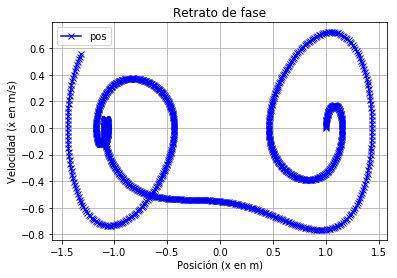

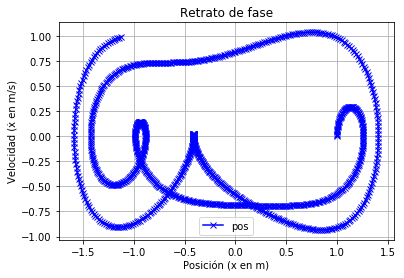

In [18]:
# Graficamos la solución
for i in range(0,len(gamma)):
    plt.figure()
    plt.title('Retrato de fase')
    plt.plot(grafx[i],grafy[i], label='pos',marker='x',color='b')
    plt.xlabel('Posición (x en m)')
    plt.ylabel('Velocidad (ẋ en m/s)')
    plt.grid(True)
    plt.legend()

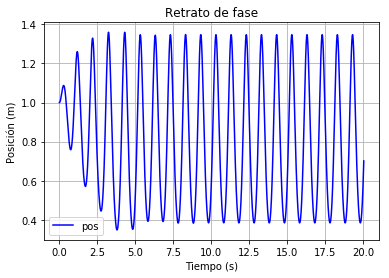

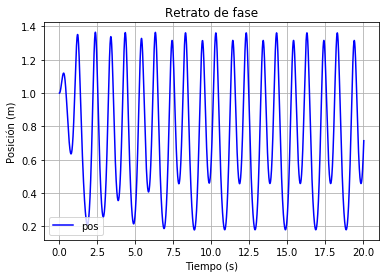

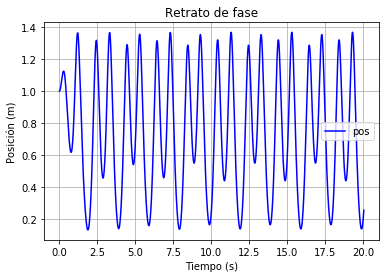

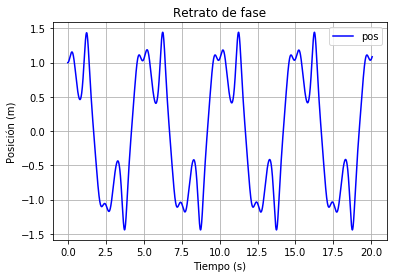

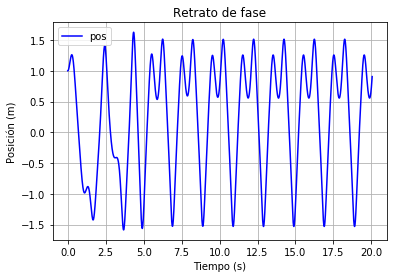

In [8]:
for i in range(0,len(gamma)):
    plt.figure()
    plt.title('Retrato de fase')
    plt.plot(tT,grafx[i], label='pos',color='b')
    plt.ylabel('Posición (m)')
    plt.xlabel('Tiempo (s)')
    plt.grid(True)
    plt.legend()

In [1]:
plt.figure()
plt.title('Retrato de fase para γ = 0.20')
plt.plot(grafx[0],grafx[1], label='pos',color='b')
plt.xlabel('Posición (m)')
plt.ylabel('Tiempo (s)')
plt.grid(True)
plt.legend()

NameError: name 'plt' is not defined